In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('01_basic_prediction.csv', index_col=0)
df.index=df.index.astype('datetime64[ns]')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   y_train       41757 non-null  float64
 1   y_prediction  43800 non-null  float64
 2   dew           43800 non-null  float64
 3   temp          43800 non-null  float64
 4   press         43800 non-null  float64
 5   w_speed       43800 non-null  float64
 6   snow          43800 non-null  float64
 7   rain          43800 non-null  float64
 8   w_dir_ne      43800 non-null  float64
 9   w_dir_nw      43800 non-null  float64
 10  w_dir_se      43800 non-null  float64
 11  w_dir_cv      43800 non-null  float64
dtypes: float64(12)
memory usage: 4.3 MB


In [3]:
df['pm_filled']=df.y_train.fillna(df.y_prediction, inplace=False)

In [4]:
df[519:].head()

y_train  y_prediction   dew  temp   press  w_speed  snow  \
date                                                                            
2010-01-23 15:00:00     17.0     21.393089 -19.0   3.0  1024.0    79.15   0.0   
2010-01-23 16:00:00     22.0     21.393089 -19.0   3.0  1024.0    86.30   0.0   
2010-01-23 17:00:00      NaN     21.302637 -18.0   2.0  1024.0    91.22   0.0   
2010-01-23 18:00:00      NaN     21.302637 -18.0   1.0  1024.0    96.14   0.0   
2010-01-23 19:00:00      NaN     21.302637 -17.0   0.0  1024.0   100.16   0.0   

                     rain  w_dir_ne  w_dir_nw  w_dir_se  w_dir_cv  pm_filled  
date                                                                          
2010-01-23 15:00:00   0.0       0.0       1.0       0.0       0.0  17.000000  
2010-01-23 16:00:00   0.0       0.0       1.0       0.0       0.0  22.000000  
2010-01-23 17:00:00   0.0       0.0       1.0       0.0       0.0  21.302637  
2010-01-23 18:00:00   0.0       0.0       1.0       0.0       0.0  21.302637  
2010-01-23 19:00:00   0.0       0.0       1.0       0.0       0.0  21.302637

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f622a4e80>,
      dtype=object)

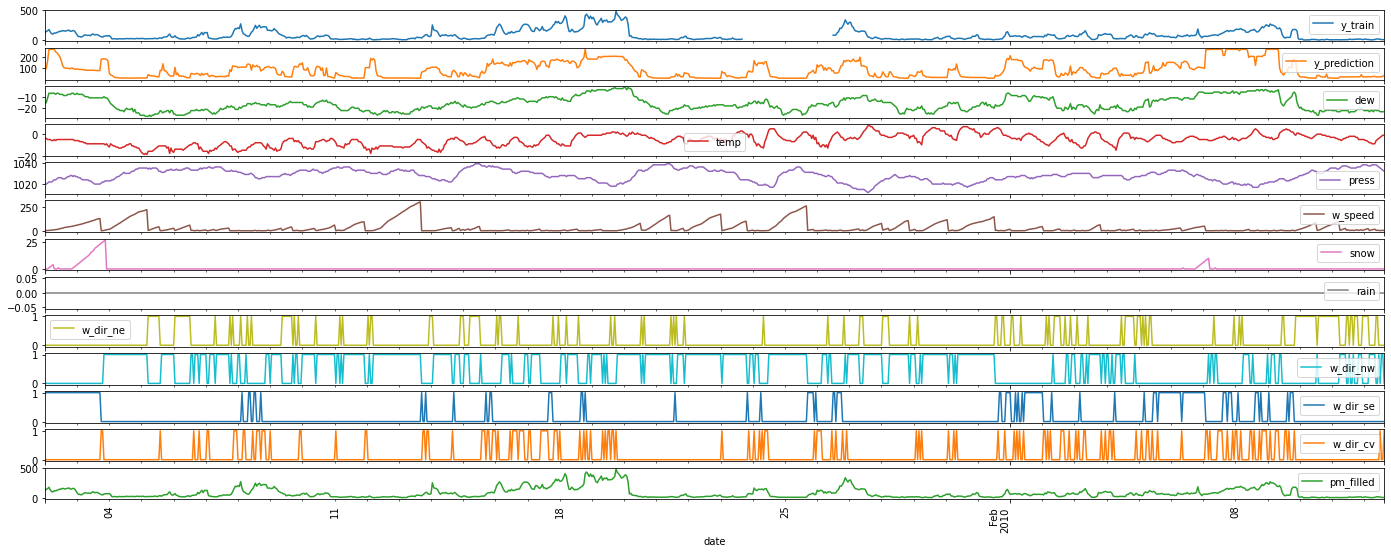

In [5]:
df[:1000].plot(subplots=True, figsize=(24, 10),rot=90)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43800 entries, 2010-01-02 00:00:00 to 2014-12-31 23:00:00
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   y_train       41757 non-null  float64
 1   y_prediction  43800 non-null  float64
 2   dew           43800 non-null  float64
 3   temp          43800 non-null  float64
 4   press         43800 non-null  float64
 5   w_speed       43800 non-null  float64
 6   snow          43800 non-null  float64
 7   rain          43800 non-null  float64
 8   w_dir_ne      43800 non-null  float64
 9   w_dir_nw      43800 non-null  float64
 10  w_dir_se      43800 non-null  float64
 11  w_dir_cv      43800 non-null  float64
 12  pm_filled     43800 non-null  float64
dtypes: float64(13)
memory usage: 4.7 MB


In [7]:
a=df.pm_filled.to_numpy()
a.shape

(43800,)

In [8]:
#https://www.programcreek.com/python/example/84067/numpy.lib.stride_tricks.as_strided
import numpy as np
def _windowed_view(x, window_size):
    """Create a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> _windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = np.lib.stride_tricks.as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y 

In [9]:
size=24*3
xy=_windowed_view(a,size)

In [10]:
y_train=xy[:,-1]
x_train=xy[:,:-1]

In [11]:
y_train.shape

(43729,)

In [12]:
x_train.shape

(43729, 71)

In [13]:
lag=size-1
lag

71

# Supervised Learning

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, n_estimators=50,random_state=0)
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv=cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [16]:
mae=-cv.mean()
mae

13.446152036217063

In [17]:
sigma=cv.std()
sigma

0.7904736521481663

In [18]:
import pickle
filename = 'pm2_5_uni.model'
pickle.dump(model, open(filename, 'wb'))

In [19]:
import pickle
filename = 'pm2_5_uni.model'
loaded_model = pickle.load(open(filename, 'rb'))

In [20]:
m=800
n=1000
xt=xy[:,:-1]
yt=xy[:,-1]
ground_truth=np.copy(yt[:n])
ground_truth[0]=120
yp=np.copy(yt[:n])
#yp[m:n]=model.predict(xt[m:n])
for i in range(m,n):
    yp[i]=model.predict([yp[i-lag:i]])
data=np.concatenate((ground_truth.reshape(-1,1),yp.reshape(-1,1)), axis=1 )
df3=pd.DataFrame(data=data,index=df.index[:n],columns=['ground_truth','prediction'])
df3.prediction[:m-3]=np.nan

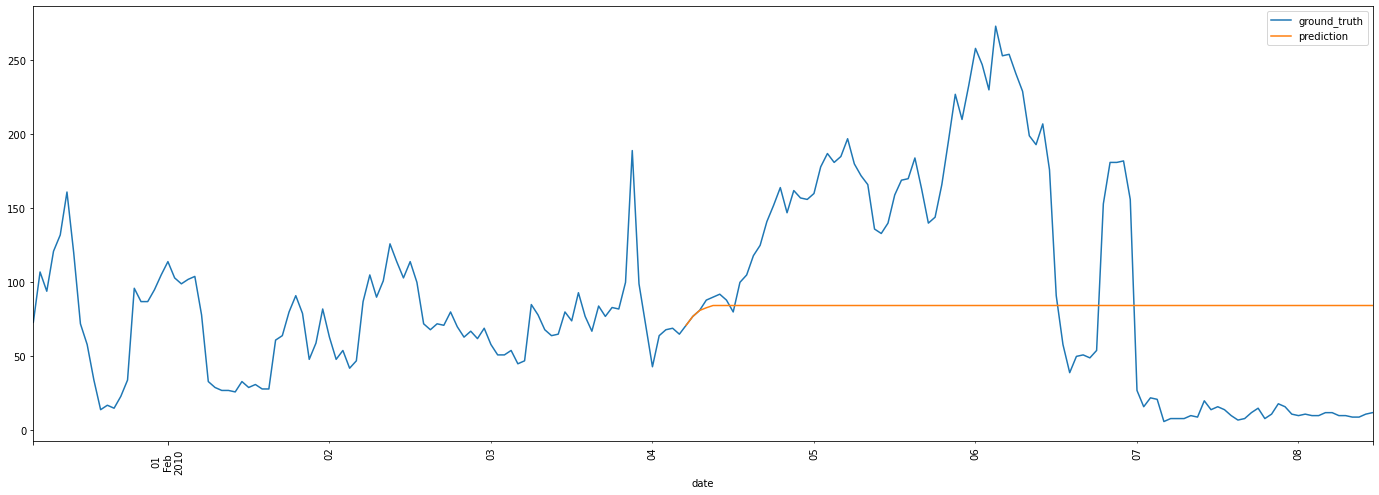

In [21]:
from matplotlib import pyplot as plt
margin=10
df3.iloc[m-100:m+100,:].plot(subplots=False, figsize=(24, 8),rot=90)
# fill_alpha = 0.5
# fill_color = '#66C2D7'
# xticks=df3.iloc[:500,:].index
# lower=df3.iloc[:500,1]-margin
# upper=df3.iloc[:500,1]+margin
# plt.fill_between(xticks, lower, upper, color=fill_color, alpha=fill_alpha, label='95% CI')